In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **What NCAA means?**
National Collegiate Athletic Association
The National Collegiate Athletic Association (NCAA) is a nonprofit organization that regulates student athletes from 1,268 North American institutions and conferences.


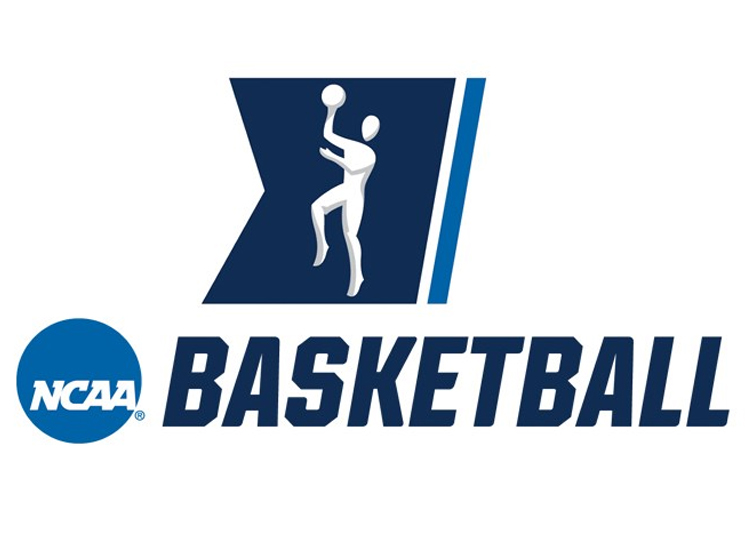

# **How does March Madness work?**
The NCAA men's basketball tournament is made up of 68 teams. ... Four of those teams are eliminated in the opening round of the tournament (known as the First Four), leaving us with a field of 64 for the first round. Those 64 teams are split into four regions of 16 teams each, with each team being ranked 1 through 16
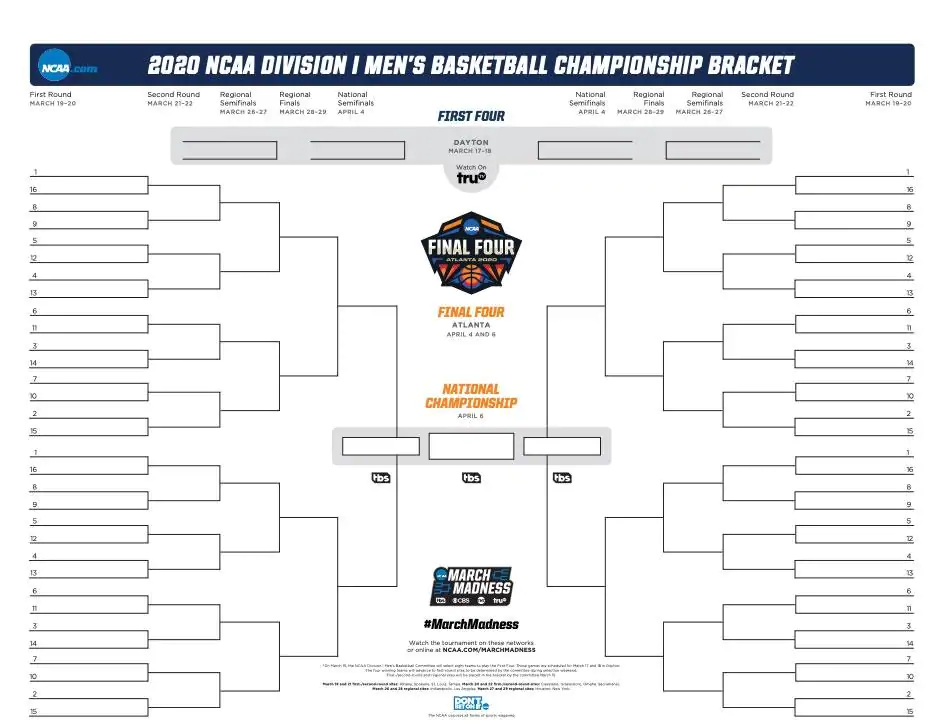

# **Interesting Facts About The NCAA**
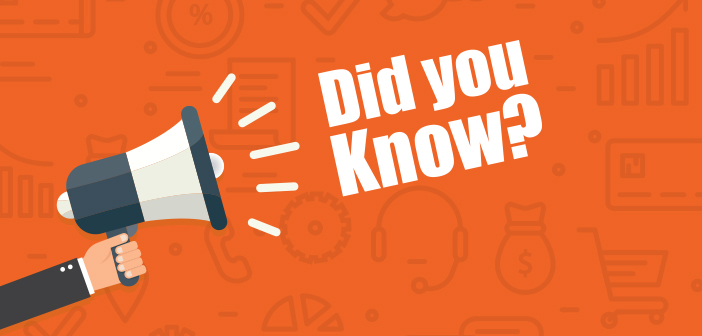

# **1. The NCAA Once Banned the Slam Dunk**
Sounds unbelievable right? How could the slam dunk, one of the most popular moves in basketball, ever be banned? Well between 1967 to 1976, the NCAA banned the slam dunk from stopping one man who would later on become Kareem Abdul-Jabbar. Lew Alcindor and his slam dunks just couldn't be stopped, and so in an attempt to stop him from dominating the court, NCAA banned the move.

# **2. It's Impossible to Pick a Perfect March Madness Bracket**
There is no such thing as the perfect bracket in March Madness. It has never happened, and chances are it will never happen. The chances of such a thing happening are so slim that you are more likely to win the Mega Millions lottery two times back to back than selecting the perfect bracket, according to math professor Jeff Bergen.


# **3. A Canadian Invented Basketball**
Canadians are associated with hockey so what are we talking about here? You probably expected that some American right would have invented basketball? Wrong! It was a Canadian physical education instructor who invented basketball in 1891 to keep his students active even on rainy days.

# **4. Peach Baskets Were the First Ever Basketball Hoops**
When the game began, peach baskets with the bottom still intact were used as basketball hoops. This of course was very problematic because the ball had to be retrieved from the basket by officials after every score. But this eventually changed in the 1900s with the introduction of string nets.

# **5. March Madness Makes Corporations Lose Quite Some Money**
March Madness creates such a frenzy and excitement that it draws employees away from their work and responsibilities, so much so that it starts to cost the company money. According to WalletHub, it is estimated that nearly $1.9 billion is lost by companies every hour because of the distraction of March Madness going on.

# **6. Only Once Have the Four #1 Seeds Won Their Regionals**
You would think that the four #1 seeds had the highest chances of winning their regionals to get to the Final Four. However, this had only happened once in NCAA history, back in 2008, when all four #1 seeds UCLA, Kansas, North Carolina and Memphis won the regionals to get to the Final Four. Meaning you should always be cautious when backing the favorites with sports betting sites such as Betway.

# **7. Lowest Ranked Seed to Ever Win Was Just #8**
If the team you're rooting for is ranked lower than #8, then chances are you won't be winning the tournament. In the history of the NCAA so far, the lowest ranked seed to win has been #8, back in 1985. This win is still considered one of the biggest upsets in NCAA history, with #8 seed Villanova beating #1 seed Georgetown.

# **8. Ohio Is the Only State to Have 2 Teams Compete in NCAA**
Back in 1961, Ohio State and University of Cincinnati both competed in the NCAA tournament, playing against one another in the championship game. This is the only time when a state has had 2 of its teams playing in the tournament.

# **9. A #5 Seed Has Never Won the Tournament**
If a #8 seed has won the tournament, then it sounds odd hearing that a #5 seed has never won it right? But it's true, 5 is the unlucky number for teams in the NCAA. Three #5 seeds (Indiana, Florida, and Butler) have made it to the championship game sure, but none have ever won.

# **10. Marquette is Kentucky's Only Weakness**
The most winningest team in NCAA history is Kentucky with 11 title wins to themselves. But Marquette is that one team that can even bring Kentucky down to its knees. The two teams have faced off ten times in NCAA history, and Marquette has won 6 of those games.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
from matplotlib.patches import Circle, Rectangle, Arc
import seaborn as sns
plt.style.use('seaborn-dark-palette')
mypal = plt.rcParams['axes.prop_cycle'].by_key()['color'] # Grab the color pal
import os #用来向Python程序提供运行环境，特别是在文件系统、创建新进程、获取操作系统本身的一些信息（比如uname)，并屏蔽各种不同操作系统之间的细节差异。
import gc #garbage collector主要依靠gc（garbage collector）模块的引用计数技术来进行垃圾回收。

MENS_DIR = '../input/google-cloud-ncaa-march-madness-2020-division-1-mens-tournament'

# Team Data

Team name and Team ID, first and last D1 Season. Sorting by the FirstD1Season column we can see some of the newest teams in D1 basketball. Welcome to D1 Merrimack! Cool mascot.

In [ ]:
MTeams = pd.read_csv(f'{MENS_DIR}/MDataFiles_Stage1/MTeams.csv')

In [ ]:
MTeams.count()

This file identifies the different college teams present in the dataset. There are overall total of 367 teams in our team listing.

In [ ]:
MTeams.head(5)

TeamID - a 4 digit id number

TeamName - a compact spelling of the team's college name, 16 characters or fewer. 


FirstD1Season - the first season in our dataset that the school was a Division-I school. 


LastD1Season - the last season in our dataset that the school was a Division-I school. 

In [ ]:
MTeams[MTeams['LastD1Season'] == 2020].count()

LastD1Season=2020, and you can confirm there are 353 such teams.  

In [ ]:
MTeams.sort_values('FirstD1Season').head()

We can find that FirstD1Season came from 1985.

In [ ]:
MTeams[MTeams['FirstD1Season'] == 1985].count()

There was 282 teams in 1985 .

In [ ]:
MTeams.sort_values('FirstD1Season', ascending=False).head(5)

We can find :    
2020 : Merrimack (TeamName)       
2019 : North Alabama(TeamName) , Cal Baptist(TeamName)


# Seasons Data

These files identify the different seasons included in the historical data, along with certain season-level properties.

In [ ]:
MSeasons = pd.read_csv(f'{MENS_DIR}/MDataFiles_Stage1/MSeasons.csv')
MSeasons.head()



Season - indicates the year in which the tournament was played. Remember that the current season counts as 2020.

DayZero - tells you the date during that season. 

RegionW, RegionX, Region Y, Region Z - by our contests' convention, each of the four regions in the final tournament is assigned a letter of W, X, Y, or Z. The national semifinal pairings in the Final Four will depend upon the overall ranks of the four #1 seeds.

# Tourney Seed Data

This file identifies the seeds for all teams in each NCAA® tournament, for all seasons of historical data.

In [ ]:
MNCAATourneySeeds = pd.read_csv(f'{MENS_DIR}/MDataFiles_Stage1/MNCAATourneySeeds.csv')

In [ ]:
MNCAATourneySeeds.head()

Season - the year that the tournament was played in

Seed - this is a 3/4-character identifier of the seed, where the first character is either W, X, Y, or Z (identifying the region the team was in) and the next two digits (either 01, 02, ..., 15, or 16) tell you the seed within the region. 

TeamID - this identifies the id number of the team, as specified in the MTeams.csv file

In [ ]:
# As Lets join this with the teams data to see some of the past matchups
MNCAATourneySeeds.merge(MTeams, validate='many_to_one').head()
#合并时有4种方法how = ['left', 'right', 'outer', 'inner']，默认值how='inner'
#validate：字符串，默认为None
#如果指定，则检查合并是否为指定的类型。
#“ one_to_one”或“ 1：1”：检查合并键在左右数据集中是否唯一。 
#“ one_to_many”或“ 1：m”：检查合并键在左数据集中是否唯一。 
#“ many_to_one”或“ m：1”：检查合并键在正确的数据集中是否唯一。 
#“ many_to_many”或“ m：m”：允许，但不进行检查。

# Regular Season Results

These files identify the game-by-game NCAA® tournament results for all seasons of historical data.

In [ ]:
MRegularSeasonCompactResults = pd.read_csv(f'{MENS_DIR}/MDataFiles_Stage1/MRegularSeasonCompactResults.csv')

In [ ]:
# We have the team the won, lost and the score.
MRegularSeasonCompactResults.head(5)



Season - this is the year of the associated entry in MSeasons.csv (the year in which the final tournament occurs). 

DayNum - this integer always ranges from 0 to 132, and tells you what day the game was played on. 

WTeamID - this identifies the id number of the team that won the game, as listed in the "MTeams.csv" file. No matter whether the game was won by the home team or visiting team, or if it was a neutral-site game, the "WTeamID" always identifies the winning team.

WScore - this identifies the number of points scored by the winning team.

LTeamID - this identifies the id number of the team that lost the game.

LScore - this identifies the number of points scored by the losing team. Thus you can be confident that WScore will be greater than LScore for all games listed.

WLoc - this identifies the "location" of the winning team. If the winning team was the home team, this value will be "H". If the winning team was the visiting team, this value will be "A". If it was played on a neutral court, then this value will be "N". 

NumOT - this indicates the number of overtime periods in the game, an integer 0 or higher.

We can join our regular season results on the team names to more clearly identify the games.

In [ ]:
# Lets Add the winning and losing team names to the results
MRegularSeasonCompactResults = \
    MRegularSeasonCompactResults \
    .merge(MTeams[['TeamName', 'TeamID']],
           left_on='WTeamID',
           right_on='TeamID',
           validate='many_to_one') \
    .drop('TeamID', axis=1) \
    .rename(columns={'TeamName': 'MTeamName'}) \
    .merge(MTeams[['TeamName', 'TeamID']],
           left_on='LTeamID',
           right_on='TeamID') \
    .drop('TeamID', axis=1) \
    .rename(columns={'TeamName': 'LTeamName'})

In [ ]:
MRegularSeasonCompactResults.head()

In [ ]:
MRegularSeasonCompactResults['Score_Diff'] = MRegularSeasonCompactResults['WScore'] - MRegularSeasonCompactResults['LScore']

In [ ]:
plt.style.use('fivethirtyeight')
MRegularSeasonCompactResults['Score_Diff'] \
    .plot(kind='hist',
          bins=90,
          figsize=(15, 5),
          label='Mens',
          alpha=0.5)
plt.title('Mens Score Differential')
plt.xlim(0,60)
plt.legend()
plt.show()


0 ~ 10 score differential is the biggest

In [ ]:
plt.style.use('fivethirtyeight')
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
MRegularSeasonCompactResults['counter'] = 1
MRegularSeasonCompactResults.groupby('MTeamName')['counter'] \
    .count() \
    .sort_values() \
    .tail(20) \
    .plot(kind='barh',
          title='⬆️ Most Regular Season Wins (Mens)',
          figsize=(15, 8),
          xlim=(400, 900),
          color=mypal[0],
          ax=axs[0])



MRegularSeasonCompactResults.groupby('MTeamName')['counter'] \
    .count() \
    .sort_values(ascending=False) \
    .tail(20) \
    .plot(kind='barh',
          title='⬇️ Least Regular Season Wins (Mens)',
          figsize=(15, 8),
          xlim=(0, 150),
          color=mypal[1],
          ax=axs[1])
plt.tight_layout()
plt.show()

The graph shows the Most Regular Season Wins (Mens) and Least Regular Season Wins (Mens)

In [ ]:
team_name = pd.read_csv('../input/google-cloud-ncaa-march-madness-2020-division-1-mens-tournament/MDataFiles_Stage1/MTeamSpellings.csv',
                       encoding='cp1252')
team_name = team_name.drop_duplicates(subset=['TeamID'], keep='last').reset_index(drop=True)
result = pd.read_csv('../input/google-cloud-ncaa-march-madness-2020-division-1-mens-tournament/MDataFiles_Stage1/MNCAATourneyCompactResults.csv')
result = result.drop(columns=['WLoc', 'NumOT', 'DayNum'])
Wname = team_name.rename(columns={'TeamNameSpelling':'Wteam_name', 'TeamID':'WTeamID'})
team_result = pd.merge(left=result, right=Wname, how='left', on=['WTeamID'])

win_by_year = team_result.groupby(['Season', 'Wteam_name'])\
              ['WScore'].count().reset_index()\
              .rename(columns={'Wteam_name':'Team', 'WScore':'Win_matches'})
              
df = win_by_year[win_by_year.Win_matches == win_by_year.Win_matches.max()].drop(columns=['Win_matches']).set_index('Season')
win_by_year = win_by_year.groupby(['Team', 'Season']).Win_matches.sum()\
              .unstack(fill_value=0).cumsum(axis=1).sort_values(by=2019, ascending=False).head(15)
cum_win = pd.melt(win_by_year, value_vars=win_by_year.columns, value_name="Win_matches")
cum_win['Team'] = list(win_by_year.index)*35
cum_win = cum_win[['Season', 'Team', 'Win_matches']]

In [ ]:
import random
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(15, 8))

colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(15)]
team2color = dict(zip(cum_win.Team, colors))

def draw_barchart(current_season):
    dff = cum_win[cum_win['Season'].eq(current_season)].sort_values(by='Win_matches', ascending=True)
    ax.clear()
    ax.barh(dff['Team'], dff['Win_matches'], color=dff['Team'].map(team2color))
    dx = dff['Win_matches'].max() / 200
    for i, (value, name) in enumerate(zip(dff['Win_matches'], dff['Team'])):
        ax.text(value-dx, i,     name,       size=10, weight=600, ha='right', va='bottom')
        ax.text(value+dx, i,     f'{value:}',size=10, ha='left',  va='center')
        
    ax.text(1, 0.4, current_season, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Matches', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.15, 'Number of win matches of top 15 NCAA teams from 1985 to 2019',
            transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    plt.box(False)
    
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1985, 2020),repeat=True, interval=500)
HTML(animator.to_jshtml())

# Event Data

Each MEvents & WEvents file lists the play-by-play event logs for more than 99.5% of games from that season. Each event is assigned to either a team or a single one of the team's players. Thus if a basket is made by one player and an assist is credited to a second player, that would show up as two separate records. The players are listed by PlayerID within the xPlayers.csv file.

Mens Event Files:

MEvents2015.csv, MEvents2016.csv, MEvent2017.csv, MEvents2018.csv, MEvents2019.csv
#Stage 1 - You should submit predicted probabilities for every possible matchup in the past 5 NCAA® tournaments (seasons 2015-2019).

In [ ]:
mens_events = []
for year in [2015, 2016, 2017, 2018, 2019]:
    mens_events.append(pd.read_csv(f'{MENS_DIR}/MEvents{year}.csv'))
MEvents = pd.concat(mens_events)
print(MEvents.shape)
MEvents.head()

In [ ]:
del mens_events
gc.collect() #表示制对所有代进行垃圾回收。 (从内存中释放超出作用范围的变量，不在使用的对象等)

# Common Event Types

In [ ]:
# Event Types
plt.style.use('fivethirtyeight')
MEvents['counter'] = 1
MEvents.groupby('EventType')['counter'] \
    .sum() \
    .sort_values(ascending=False) \
    .plot(kind='bar',
          figsize=(15, 5),
         color=mypal[2],
         title='Event Type Frequency (Mens)')
plt.xticks(rotation=0)
plt.show()


This shows the Event Type Frequency (Mens)

# Area of Event

We are told that the Area feature describes the 13 "areas" of the court, as follows: 1=under basket; 2=in the paint; 3=inside right wing; 4=inside right; 5=inside center; 6=inside left; 7=inside left wing; 8=outside right wing; 9=outside right; 10=outside center; 11=outside left; 12=outside left wing; 13=backcourt.

We can map these values to their names.

In [ ]:
area_mapping = {0: np.nan,
                1: 'under basket',
                2: 'in the paint',
                3: 'inside right wing',
                4: 'inside right',
                5: 'inside center',
                6: 'inside left',
                7: 'inside left wing',
                8: 'outside right wing',
                9: 'outside right',
                10: 'outside center',
                11: 'outside left',
                12: 'outside left wing',
                13: 'backcourt'}

MEvents['Area_Name'] = MEvents['Area'].map(area_mapping)

In [ ]:
MEvents.groupby('Area_Name')['counter'].sum() \
    .sort_values() \
    .plot(kind='barh',
          figsize=(15, 8),
          title='Frequency of Event Area')
plt.show()

under basket is the most Frequency of Event Area

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
for i, d in MEvents.loc[~MEvents['Area_Name'].isna()].groupby('Area_Name'):
    d.plot(x='X', y='Y', style='.', label=i, ax=ax, title='Visualizing Event Areas')
    ax.legend()
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
plt.show()

# Plotting X, Y Data

This is some of the most exciting data provided, but after looking there are some things to consider.

X, Y points are not available for all games- so this is not a complete sample
The X/Y position is provided for fouls, turnovers, and field-goal attempts (either 2-point or 3-point). No X/Y data for other events.

In [ ]:
# Normalize X, Y positions for court dimentions
# Court is 50 feet wide and 94 feet end to end.
MEvents['X_'] = (MEvents['X'] * (94/100))
MEvents['Y_'] = (MEvents['Y'] * (50/100))

# NCAA Court Plot Function

Check out my notebook here for an example and code for a half court plot:

https://www.kaggle.com/robikscube/ncaa-basketball-court-plot-helper-functions

In [ ]:
def create_ncaa_full_court(ax=None, three_line='mens', court_color='#dfbb85',
                           lw=3, lines_color='black', lines_alpha=0.5,
                           paint_fill='blue', paint_alpha=0.4,
                           inner_arc=False):
    """
    Version 2020.2.19
    Creates NCAA Basketball Court
    Dimensions are in feet (Court is 97x50 ft)
    Created by: Rob Mulla / https://github.com/RobMulla

    * Note that this function uses "feet" as the unit of measure.
    * NCAA Data is provided on a x range: 0, 100 and y-range 0 to 100
    * To plot X/Y positions first convert to feet like this:
    ```
    Events['X_'] = (Events['X'] * (94/100))
    Events['Y_'] = (Events['Y'] * (50/100))
    ```
    
    ax: matplotlib axes if None gets current axes using `plt.gca`


    three_line: 'mens', 'womens' or 'both' defines 3 point line plotted
    court_color : (hex) Color of the court
    lw : line width
    lines_color : Color of the lines
    lines_alpha : transparency of lines
    paint_fill : Color inside the paint
    paint_alpha : transparency of the "paint"
    inner_arc : paint the dotted inner arc
    """
    if ax is None:
        ax = plt.gca()

    # Create Pathes for Court Lines
    center_circle = Circle((94/2, 50/2), 6,
                           linewidth=lw, color=lines_color, lw=lw,
                           fill=False, alpha=lines_alpha)
    hoop_left = Circle((5.25, 50/2), 1.5 / 2,
                       linewidth=lw, color=lines_color, lw=lw,
                       fill=False, alpha=lines_alpha)
    hoop_right = Circle((94-5.25, 50/2), 1.5 / 2,
                        linewidth=lw, color=lines_color, lw=lw,
                        fill=False, alpha=lines_alpha)

    # Paint - 18 Feet 10 inches which converts to 18.833333 feet - gross!
    left_paint = Rectangle((0, (50/2)-6), 18.833333, 12,
                           fill=paint_fill, alpha=paint_alpha,
                           lw=lw, edgecolor=None)
    right_paint = Rectangle((94-18.83333, (50/2)-6), 18.833333,
                            12, fill=paint_fill, alpha=paint_alpha,
                            lw=lw, edgecolor=None)
    
    left_paint_boarder = Rectangle((0, (50/2)-6), 18.833333, 12,
                           fill=False, alpha=lines_alpha,
                           lw=lw, edgecolor=lines_color)
    right_paint_boarder = Rectangle((94-18.83333, (50/2)-6), 18.833333,
                            12, fill=False, alpha=lines_alpha,
                            lw=lw, edgecolor=lines_color)

    left_arc = Arc((18.833333, 50/2), 12, 12, theta1=-
                   90, theta2=90, color=lines_color, lw=lw,
                   alpha=lines_alpha)
    right_arc = Arc((94-18.833333, 50/2), 12, 12, theta1=90,
                    theta2=-90, color=lines_color, lw=lw,
                    alpha=lines_alpha)
    
    leftblock1 = Rectangle((7, (50/2)-6-0.666), 1, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    leftblock2 = Rectangle((7, (50/2)+6), 1, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    ax.add_patch(leftblock1)
    ax.add_patch(leftblock2)
    
    left_l1 = Rectangle((11, (50/2)-6-0.666), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    left_l2 = Rectangle((14, (50/2)-6-0.666), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    left_l3 = Rectangle((17, (50/2)-6-0.666), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    ax.add_patch(left_l1)
    ax.add_patch(left_l2)
    ax.add_patch(left_l3)
    left_l4 = Rectangle((11, (50/2)+6), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    left_l5 = Rectangle((14, (50/2)+6), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    left_l6 = Rectangle((17, (50/2)+6), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    ax.add_patch(left_l4)
    ax.add_patch(left_l5)
    ax.add_patch(left_l6)
    
    rightblock1 = Rectangle((94-7-1, (50/2)-6-0.666), 1, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    rightblock2 = Rectangle((94-7-1, (50/2)+6), 1, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    ax.add_patch(rightblock1)
    ax.add_patch(rightblock2)

    right_l1 = Rectangle((94-11, (50/2)-6-0.666), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    right_l2 = Rectangle((94-14, (50/2)-6-0.666), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    right_l3 = Rectangle((94-17, (50/2)-6-0.666), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    ax.add_patch(right_l1)
    ax.add_patch(right_l2)
    ax.add_patch(right_l3)
    right_l4 = Rectangle((94-11, (50/2)+6), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    right_l5 = Rectangle((94-14, (50/2)+6), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    right_l6 = Rectangle((94-17, (50/2)+6), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    ax.add_patch(right_l4)
    ax.add_patch(right_l5)
    ax.add_patch(right_l6)
    
    # 3 Point Line
    if (three_line == 'mens') | (three_line == 'both'):
        # 22' 1.75" distance to center of hoop
        three_pt_left = Arc((6.25, 50/2), 44.291, 44.291, theta1=-78,
                            theta2=78, color=lines_color, lw=lw,
                            alpha=lines_alpha)
        three_pt_right = Arc((94-6.25, 50/2), 44.291, 44.291,
                             theta1=180-78, theta2=180+78,
                             color=lines_color, lw=lw, alpha=lines_alpha)

        # 4.25 feet max to sideline for mens
        ax.plot((0, 11.25), (3.34, 3.34),
                color=lines_color, lw=lw, alpha=lines_alpha)
        ax.plot((0, 11.25), (50-3.34, 50-3.34),
                color=lines_color, lw=lw, alpha=lines_alpha)
        ax.plot((94-11.25, 94), (3.34, 3.34),
                color=lines_color, lw=lw, alpha=lines_alpha)
        ax.plot((94-11.25, 94), (50-3.34, 50-3.34),
                color=lines_color, lw=lw, alpha=lines_alpha)
        ax.add_patch(three_pt_left)
        ax.add_patch(three_pt_right)

    if (three_line == 'womens') | (three_line == 'both'):
        # womens 3
        three_pt_left_w = Arc((6.25, 50/2), 20.75 * 2, 20.75 * 2, theta1=-85,
                              theta2=85, color=lines_color, lw=lw, alpha=lines_alpha)
        three_pt_right_w = Arc((94-6.25, 50/2), 20.75 * 2, 20.75 * 2,
                               theta1=180-85, theta2=180+85,
                               color=lines_color, lw=lw, alpha=lines_alpha)

        # 4.25 inches max to sideline for mens
        ax.plot((0, 8.3), (4.25, 4.25), color=lines_color,
                lw=lw, alpha=lines_alpha)
        ax.plot((0, 8.3), (50-4.25, 50-4.25),
                color=lines_color, lw=lw, alpha=lines_alpha)
        ax.plot((94-8.3, 94), (4.25, 4.25),
                color=lines_color, lw=lw, alpha=lines_alpha)
        ax.plot((94-8.3, 94), (50-4.25, 50-4.25),
                color=lines_color, lw=lw, alpha=lines_alpha)

        ax.add_patch(three_pt_left_w)
        ax.add_patch(three_pt_right_w)

    # Add Patches
    ax.add_patch(left_paint)
    ax.add_patch(left_paint_boarder)
    ax.add_patch(right_paint)
    ax.add_patch(right_paint_boarder)
    ax.add_patch(center_circle)
    ax.add_patch(hoop_left)
    ax.add_patch(hoop_right)
    ax.add_patch(left_arc)
    ax.add_patch(right_arc)
    
    if inner_arc:
        left_inner_arc = Arc((18.833333, 50/2), 12, 12, theta1=90,
                             theta2=-90, color=lines_color, lw=lw,
                       alpha=lines_alpha, ls='--')
        right_inner_arc = Arc((94-18.833333, 50/2), 12, 12, theta1=-90,
                        theta2=90, color=lines_color, lw=lw,
                        alpha=lines_alpha, ls='--')
        ax.add_patch(left_inner_arc)
        ax.add_patch(right_inner_arc)

    # Restricted Area Marker
    restricted_left = Arc((6.25, 50/2), 8, 8, theta1=-90,
                        theta2=90, color=lines_color, lw=lw,
                        alpha=lines_alpha)
    restricted_right = Arc((94-6.25, 50/2), 8, 8,
                         theta1=180-90, theta2=180+90,
                         color=lines_color, lw=lw, alpha=lines_alpha)
    ax.add_patch(restricted_left)
    ax.add_patch(restricted_right)
    
    # Backboards
    ax.plot((4, 4), ((50/2) - 3, (50/2) + 3),
            color=lines_color, lw=lw*1.5, alpha=lines_alpha)
    ax.plot((94-4, 94-4), ((50/2) - 3, (50/2) + 3),
            color=lines_color, lw=lw*1.5, alpha=lines_alpha)
    ax.plot((4, 4.6), (50/2, 50/2), color=lines_color,
            lw=lw, alpha=lines_alpha)
    ax.plot((94-4, 94-4.6), (50/2, 50/2),
            color=lines_color, lw=lw, alpha=lines_alpha)

    # Half Court Line
    ax.axvline(94/2, color=lines_color, lw=lw, alpha=lines_alpha)

    # Boarder
    boarder = Rectangle((0.3,0.3), 94-0.4, 50-0.4, fill=False, lw=3, color='black', alpha=lines_alpha)
    ax.add_patch(boarder)
    
    # Plot Limit
    ax.set_xlim(0, 94)
    ax.set_ylim(0, 50)
    ax.set_facecolor(court_color)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    return ax


fig, ax = plt.subplots(figsize=(15, 8.5))
create_ncaa_full_court(ax, three_line='both', paint_alpha=0.4)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7.8))
ms = 10
ax = create_ncaa_full_court(ax, paint_alpha=0.1)
MEvents.query('EventType == "turnover"') \
    .plot(x='X_', y='Y_', style='X',
          title='Turnover Locations (Mens)',
          c='red',
          alpha=0.3,
         figsize=(15, 9),
         label='Steals',
         ms=ms,
         ax=ax)
ax.set_xlabel('')
ax.get_legend().remove()
plt.show()

![](https://www.sportingcharts.com/media/240276/restricted_area.jpg)

Obviously, there are more mistakes near the stadium, and the closer to the stadium lead to more competition

In [ ]:
COURT_COLOR = '#dfbb85'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
# Where are 3 pointers made from? (This is really cool)
MEvents.query('EventType == "made3"') \
    .plot(x='X_', y='Y_', style='.',
          color='blue',
          title='3 Pointers Made (Mens)',
          alpha=0.01, ax=ax1)
ax1 = create_ncaa_full_court(ax1, lw=0.5, three_line='mens', paint_alpha=0.1)
ax1.set_facecolor(COURT_COLOR)
MEvents.query('EventType == "miss3"') \
    .plot(x='X_', y='Y_', style='.',
          title='3 Pointers Missed (Mens)',
          color='red',
          alpha=0.01, ax=ax2)
ax2.set_facecolor(COURT_COLOR)
ax2 = create_ncaa_full_court(ax2, lw=0.5, three_line='mens', paint_alpha=0.1)
ax1.get_legend().remove()
ax2.get_legend().remove()
ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])
ax1.set_xlabel('')
ax2.set_xlabel('')
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
# Where are 3 pointers made from? (This is really cool)
MEvents.query('EventType == "made2"') \
    .plot(x='X_', y='Y_', style='.',
          color='blue',
          title='2 Pointers Made (mens)',
          alpha=0.01, ax=ax1)
ax1.set_facecolor(COURT_COLOR)
ax1 = create_ncaa_full_court(ax1, lw=0.5, three_line='mens', paint_alpha=0.1)
MEvents.query('EventType == "miss2"') \
    .plot(x='X_', y='Y_', style='.',
          title='2 Pointers Missed (mens)',
          color='red',
          alpha=0.01, ax=ax2)
ax2.set_facecolor(COURT_COLOR)
ax2 = create_ncaa_full_court(ax2, lw=0.5, three_line='mens', paint_alpha=0.1)
ax1.get_legend().remove()
ax2.get_legend().remove()
ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])
ax1.set_xlabel('')
ax2.set_xlabel('')
plt.show()

Obviously, there are more mistakes or Made near the stadium, and the closer to the stadium lead to more competition

# Player IDs

There is an issue when trying to read in lines where the player name has a comma. We can use *[error_bad_lines](http://)* to get past this, but ideally the data would be cleaned to remove the comma or a different delimiter would be used.

In [ ]:
MPlayers = pd.read_csv(f'{MENS_DIR}/MPlayers.csv', error_bad_lines=False)

In [ ]:
MPlayers.head()

In [ ]:
MPlayers[(MPlayers['LastName']=='Williamson')&(MPlayers['FirstName']=='Zion')]

In [ ]:
# Merge Player name onto events
MEvents = MEvents.merge(MPlayers,
              how='left',
              left_on='EventPlayerID',
              right_on='PlayerID')


# Common Events by Player

In [ ]:
MEvents.loc[MEvents['PlayerID'] == 2825].groupby('EventType')['EventID'].count() \
    .sort_values() \
    .plot(kind='barh',
          figsize=(15, 5),
          title='Zion Williamson event type count',
          color=mypal[1])
plt.show()

# Plotting Specific Players' Made/Missed Shots

Now that we have player names in the event data, lets single out specific players. Starting with one of the most exciting players of the last decade.

In [ ]:
ms = 10 # Marker Size
FirstName = 'Zion'
LastName = 'Williamson'
fig, ax = plt.subplots(figsize=(15, 8))
ax = create_ncaa_full_court(ax)
MEvents.query('FirstName == @FirstName and LastName == @LastName and EventType == "made2"') \
    .plot(x='X_', y='Y_', style='o',
          title='Shots (Zion Williamson)',
          alpha=0.5,
         figsize=(15, 8),
         label='Made 2',
         ms=ms,
         ax=ax)
plt.legend()
MEvents.query('FirstName == @FirstName and LastName == @LastName and EventType == "miss2"') \
    .plot(x='X_', y='Y_', style='X',
          alpha=0.5, ax=ax,
         label='Missed 2',
         ms=ms)
plt.legend()
MEvents.query('FirstName == @FirstName and LastName == @LastName and EventType == "made3"') \
    .plot(x='X_', y='Y_', style='o',
          c='brown',
          alpha=0.5,
         figsize=(15, 8),
         label='Made 3', ax=ax,
         ms=ms)
plt.legend()
MEvents.query('FirstName == @FirstName and LastName == @LastName and EventType == "miss3"') \
    .plot(x='X_', y='Y_', style='X',
          c='green',
          alpha=0.5, ax=ax,
         label='Missed 3',
         ms=ms)
ax.set_xlabel('')
plt.legend()
plt.show()

# Shot Heatmap

We can plot a heatmap of where shots occur on the court. Interesting observation is that many of the shots for mens come from directly under the hoop

In [ ]:
N_bins = 100
shot_events = MEvents.loc[MEvents['EventType'].isin(['miss3','made3','miss2','made2']) & (MEvents['X_'] != 0)]
fig, ax = plt.subplots(figsize=(15, 7))
ax = create_ncaa_full_court(ax,
                            paint_alpha=0.0,
                            three_line='mens',
                            court_color='black',
                            lines_color='white')
_ = plt.hist2d(shot_events['X_'].values + np.random.normal(0, 0.1, shot_events['X_'].shape), # Add Jitter to values for plotting
           shot_events['Y_'].values + np.random.normal(0, 0.1, shot_events['Y_'].shape),
           bins=N_bins, norm=mpl.colors.LogNorm(),
               cmap='plasma')

# Plot a colorbar with label.
cb = plt.colorbar()
cb.set_label('Number of shots')

ax.set_title('Shot Heatmap (Mens)')
plt.show()